# SDG Classification - Data Exploration

This notebook explores the OSDG dataset and demonstrates the SDG classification pipeline.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.append('../src')

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("Environment setup complete!")

Environment setup complete!


## 1. Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/osdg-community-data-v2024-04-01.csv', sep='\t')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display first few rows
df.head()

Dataset shape: (43025, 7)
Columns: ['doi', 'text_id', 'text', 'sdg', 'labels_negative', 'labels_positive', 'agreement']


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,8,0.777778
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,8,0.777778
3,10.1787/3726edff-en,0005d3e8b213d9e2cb967666e1aca2e9,Applied research is directed “primarily toward...,9,3,6,0.333333
4,10.1787/5k9b7bn5qzvd-en,0006a887475ccfa5a7f5f51d4ac83d02,The extent to which they are akin to corruptio...,3,1,2,0.333333


In [3]:
# Dataset info
print("Dataset Info:")
print(f"Total samples: {len(df):,}")
print(f"Missing values per column:")
print(df.isnull().sum())

print(f"\nUnique SDGs: {sorted(df['sdg'].unique())}")
print(f"Number of unique SDGs: {df['sdg'].nunique()}")

Dataset Info:
Total samples: 43,025
Missing values per column:
doi                0
text_id            0
text               0
sdg                0
labels_negative    0
labels_positive    0
agreement          0
dtype: int64

Unique SDGs: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16)]
Number of unique SDGs: 16


## 2. SDG Distribution Analysis

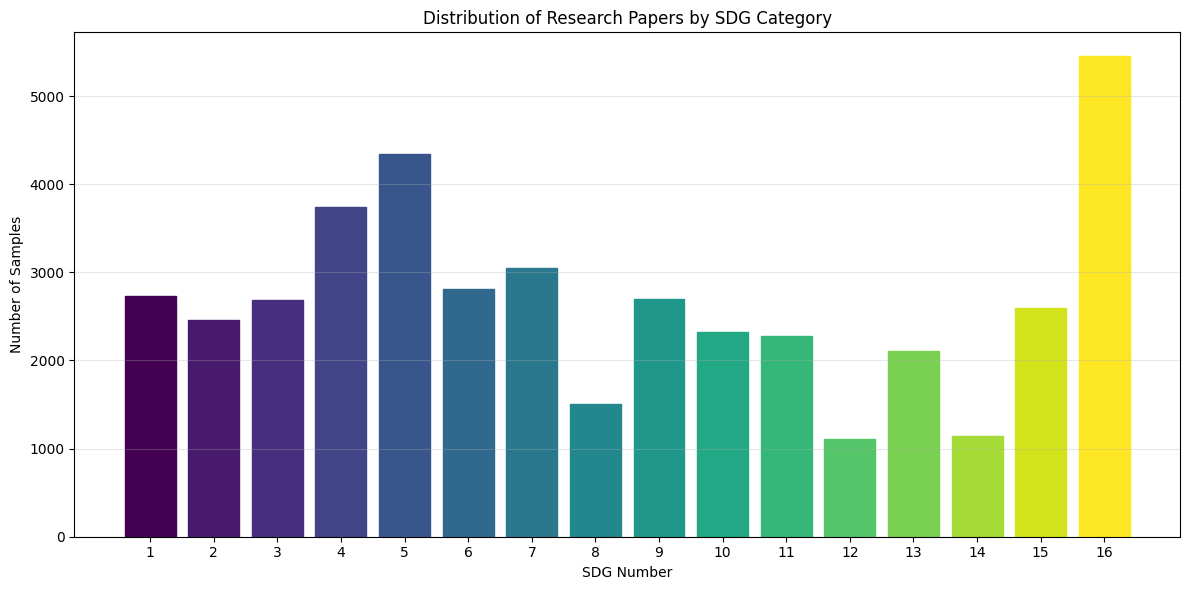

SDG Distribution:
SDG  1: 2,734 samples (6.4%)
SDG  2: 2,457 samples (5.7%)
SDG  3: 2,689 samples (6.2%)
SDG  4: 3,740 samples (8.7%)
SDG  5: 4,338 samples (10.1%)
SDG  6: 2,815 samples (6.5%)
SDG  7: 3,048 samples (7.1%)
SDG  8: 1,509 samples (3.5%)
SDG  9: 2,697 samples (6.3%)
SDG 10: 2,318 samples (5.4%)
SDG 11: 2,277 samples (5.3%)
SDG 12: 1,108 samples (2.6%)
SDG 13: 2,102 samples (4.9%)
SDG 14: 1,141 samples (2.7%)
SDG 15: 2,601 samples (6.0%)
SDG 16: 5,451 samples (12.7%)


In [4]:
# SDG distribution
sdg_counts = df['sdg'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(sdg_counts.index, sdg_counts.values)
plt.xlabel('SDG Number')
plt.ylabel('Number of Samples')
plt.title('Distribution of Research Papers by SDG Category')
plt.xticks(sdg_counts.index)

# Color bars
colors = plt.cm.viridis(np.linspace(0, 1, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("SDG Distribution:")
for sdg, count in sdg_counts.items():
    print(f"SDG {sdg:2d}: {count:5,} samples ({count/len(df)*100:.1f}%)")

## 3. Text Analysis

Text Statistics:
Average text length: 624 characters
Average word count: 94 words
Median word count: 89 words


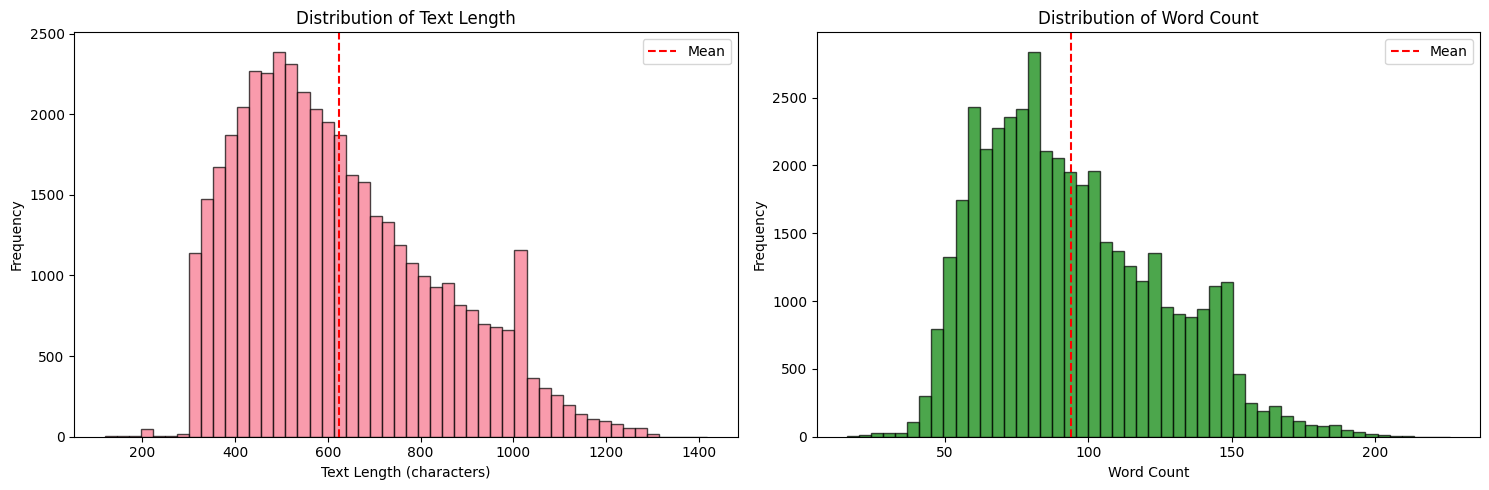

In [5]:
# Text length analysis
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print("Text Statistics:")
print(f"Average text length: {df['text_length'].mean():.0f} characters")
print(f"Average word count: {df['word_count'].mean():.0f} words")
print(f"Median word count: {df['word_count'].median():.0f} words")

# Plot text length distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Character length distribution
ax1.hist(df['text_length'], bins=50, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Text Length (characters)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Text Length')
ax1.axvline(df['text_length'].mean(), color='red', linestyle='--', label='Mean')
ax1.legend()

# Word count distribution
ax2.hist(df['word_count'], bins=50, alpha=0.7, edgecolor='black', color='green')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Word Count')
ax2.axvline(df['word_count'].mean(), color='red', linestyle='--', label='Mean')
ax2.legend()

plt.tight_layout()
plt.show()

## 4. Sample Texts by SDG

In [6]:
# Show sample texts for each SDG
sdg_names = {
    1: "No Poverty",
    2: "Zero Hunger", 
    3: "Good Health and Well-being",
    4: "Quality Education",
    5: "Gender Equality",
    6: "Clean Water and Sanitation",
    7: "Affordable and Clean Energy",
    8: "Decent Work and Economic Growth",
    9: "Industry, Innovation and Infrastructure",
    10: "Reduced Inequality",
    11: "Sustainable Cities and Communities",
    12: "Responsible Consumption and Production",
    13: "Climate Action",
    14: "Life Below Water",
    15: "Life on Land",
    16: "Peace and Justice Strong Institutions"
}

print("Sample texts for each SDG:")
print("=" * 80)

for sdg in sorted(df['sdg'].unique()):
    if sdg in sdg_names:
        sample_text = df[df['sdg'] == sdg]['text'].iloc[0]
        print(f"\nSDG {sdg}: {sdg_names[sdg]}")
        print("-" * 50)
        print(f"Sample: {sample_text[:200]}..." if len(sample_text) > 200 else sample_text)
        print(f"Count: {(df['sdg'] == sdg).sum():,} samples")

Sample texts for each SDG:

SDG 1: No Poverty
--------------------------------------------------
Sample: Although the impacts of these imbalances are not fully apparent in the short run, they pose formidable challenges to the sustainability of development of the LDCs, particularly in the long run. The pr...
Count: 2,734 samples

SDG 2: Zero Hunger
--------------------------------------------------
Sample: Previous chapters have discussed ways to make food systems more supportive of food security and better nutrition. Nutrition-sensitive food systems can give consumers better options, but ultimately it ...
Count: 2,457 samples

SDG 3: Good Health and Well-being
--------------------------------------------------
Sample: The average figure also masks large differences across regions in Kazakhstan. The number of annual contacts ranges from 2.0 in Astana to 9.7 in Mangystau, and some parts of the population are likely t...
Count: 2,689 samples

SDG 4: Quality Education
---------------------

## 5. Test Text Preprocessing

In [7]:
# Test the text preprocessor
from src.data.preprocess import TextPreprocessor

preprocessor = TextPreprocessor(remove_stopwords=True, lowercase=True)

# Test on a sample text
sample_text = df['text'].iloc[0]
cleaned_text = preprocessor.clean_text(sample_text)

print("Text Preprocessing Example:")
print("=" * 50)
print(f"Original ({len(sample_text)} chars):")
print(sample_text[:300] + "..." if len(sample_text) > 300 else sample_text)
print(f"\nCleaned ({len(cleaned_text)} chars):")
print(cleaned_text[:300] + "..." if len(cleaned_text) > 300 else cleaned_text)

print(f"\nReduction: {len(sample_text) - len(cleaned_text)} characters ({(1-len(cleaned_text)/len(sample_text))*100:.1f}%)")

ModuleNotFoundError: No module named 'src'

## 6. Quick Model Test

In [ ]:
# Quick test with a small sample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Sample data for quick test
sample_df = df.sample(n=1000, random_state=42)  # Use 1000 samples for quick test

# Preprocess texts
preprocessed_texts = [preprocessor.clean_text(text) for text in sample_df['text']]

# Remove empty texts
valid_indices = [i for i, text in enumerate(preprocessed_texts) if len(text.strip()) > 0]
X_texts = [preprocessed_texts[i] for i in valid_indices]
y_labels = sample_df['sdg'].iloc[valid_indices].values

print(f"Valid samples for modeling: {len(X_texts)}")

# Vectorize
vectorizer = TfidfVectorizer(max_features=1000, min_df=2, max_df=0.95)
X = vectorizer.fit_transform(X_texts)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=42, stratify=y_labels)

# Train model
model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nQuick Model Test Results:")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Features: {X.shape[1]}")
print(f"Test Accuracy: {accuracy:.4f}")

# Show top features
feature_names = vectorizer.get_feature_names_out()
importance_scores = model.feature_importances_
top_features_idx = np.argsort(importance_scores)[-10:]

print(f"\nTop 10 Important Features:")
for i, idx in enumerate(reversed(top_features_idx)):
    print(f"{i+1:2d}. {feature_names[idx]:<15} (importance: {importance_scores[idx]:.4f})")

## 7. Next Steps

This notebook demonstrated:
1. **Dataset exploration** - Understanding the structure and distribution
2. **Text analysis** - Examining text characteristics
3. **Preprocessing** - Cleaning and preparing text data
4. **Quick modeling** - Testing basic classification

To run the full MLOps pipeline:

```bash
# Run complete pipeline
dvc repro

# View metrics
dvc metrics show

# View pipeline
dvc dag
```

The pipeline will:
- Preprocess the full dataset
- Train optimized models
- Generate comprehensive evaluation metrics
- Create visualizations and reports
- Export deployment-ready models